An important feature of most query operators is that they `execute` ***not when constructed*** but when `enumerated`

In [ ]:
var numbers = new List<int> { 1 };

IEnumerable<int> query = numbers.Select (n => n * 10); // Build query

numbers.Add (2); // Sneak in an extra element

foreach (int n in query)
Console.Write (n + "|"); // 10|20|

This is called `deferred` or `lazy` execution and is the same as what happens with `delegates`

In [ ]:
Action a = () => Console.WriteLine ("Foo");
// We’ve not written anything to the Console yet. Now let’s run it:
a(); // Deferred execution!

All standard query operators provide deferred execution, with the following
exceptions:  
  
- Operators that return a `single element` or `scalar value`, such as `First` or `Count`
- The following conversion operators:  
    
  `ToArray`, `ToList`, `ToDictionary`, `ToLookup`, `ToHashSet`

Deferred execution is important because it ***decouples*** `query construction` from `query execution`.

### Reevaluation

a deferred execution query is ***reevaluated*** when you ***reenumerate***

In [ ]:
var numbers = new List<int>() { 1, 2 };

IEnumerable<int> query = numbers.Select (n => n * 10);
foreach (int n in query) Console.Write (n + "|"); // 10|20|

numbers.Clear();
foreach (int n in query) Console.Write (n + "|"); // <nothing>

There are a couple of reasons why reevaluation is sometimes `disadvantageous`:  
  
- Sometimes, you want to `freeze` or cache the results at a certain point in time.
- Some queries are `computationally intensive` (or rely on querying a remote database), so you don’t want to unnecessarily repeat them.

You can defeat reevaluation by calling a ***conversion operator*** such as `ToArray` or `ToList`.

### Captured Variables

If your query’s lambda expressions `capture outer variables`, the query will honor the value of those variables `at the time the query run`s

In [ ]:
int[] numbers = { 1, 2 };

int factor = 10;

IEnumerable<int> query = numbers.Select (n => n * factor);

factor = 20;

foreach (int n in query) Console.Write (n + "|"); // 20|40|

In [ ]:
IEnumerable<char> query = "Not what you might expect";
query = query.Where (c => c != 'a');
query = query.Where (c => c != 'e');
query = query.Where (c => c != 'i');
query = query.Where (c => c != 'o');
query = query.Where (c => c != 'u');
foreach (char c in query) Console.Write (c); // Nt wht y mght xpct

//now, do this solution
string vowels = "aeiou";

for (int i = 0; i < vowels.Length; i++)
    query = query.Where (c => c != vowels[i]);

foreach (char c in query) Console.Write (c);

// we get an IndexOutOfRangeException !!!????

//after for loop, i is 5 when we enumerating upon query, query execute 
// `query.Where (c => c != vowels[i]);`
// in this point i is 5 

//now, we change strategy

for (int i = 0; i < vowels.Length; i++)
{
    char vowel = vowels[i];
    query = query.Where (c => c != vowel);
}
//or
foreach (char vowel in vowels)
    query = query.Where (c => c != vowel);

### How Deferred Execution Works

Query operators provide `deferred execution` by returning `decorator sequences`.

<div dir="rtl" style="width:90%;">
وقتی که شما یک کوئری LINQ را تعریف می‌کنید، آنچه باز می‌گردد، یک دنباله (sequence) است که می‌توان آن را "تزئین‌شده" در نظر گرفت. این دنباله‌ها با استفاده از اپراتورهای مختلف مانند <b>Where</b>, <b>Select</b>, <b>OrderBy</b> و غیره می‌توانند تزئین شوند. این بدان معناست که به جای بازگشت داده‌ها در فرم نهایی، یک شیء بازمی‌گردد که توصیف می‌کند چگونه داده‌ها باید تحت تأثیر قرار گیرند و ترتیب داده شوند.
</div>

Calling `Where` merely `constructs the decorator wrapper sequence`, which holds a
`reference` to the `input sequence`, the `lambda expression`, and `any other arguments`
supplied.

In [ ]:
IEnumerable<int> lessThanTen = new int[] { 5, 12, 3 }.Where (n => n < 10);

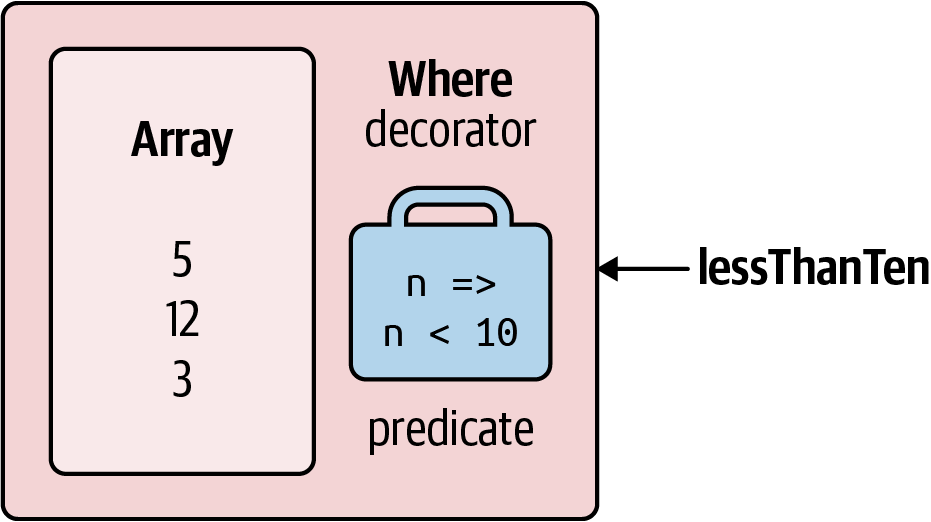

when you call an `operator` such as `Select` or `Where`, you’re doing nothing more than `instantiating an enumerable class` that `decorates` the `input sequence`.

### Chaining Decorators

In [ ]:
IEnumerable<int> query = new int[] { 5, 12, 3 }
    .Where (n => n < 10)
    .OrderBy (n => n)
    .Select (n => n * 10);

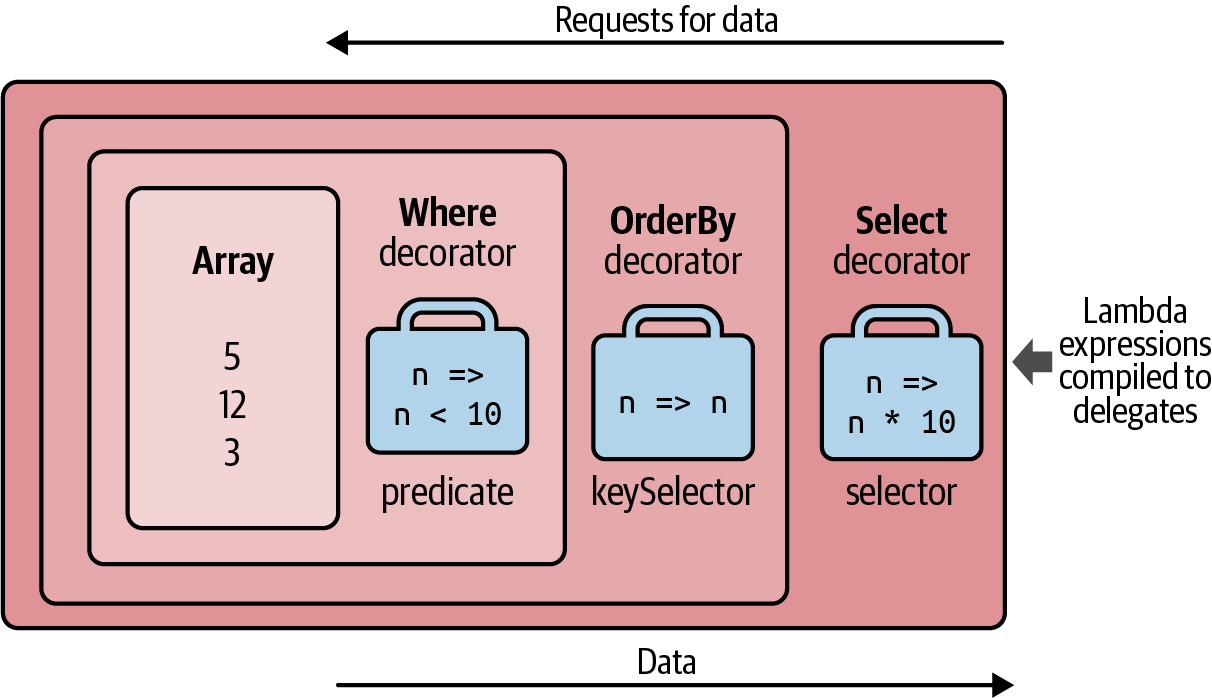

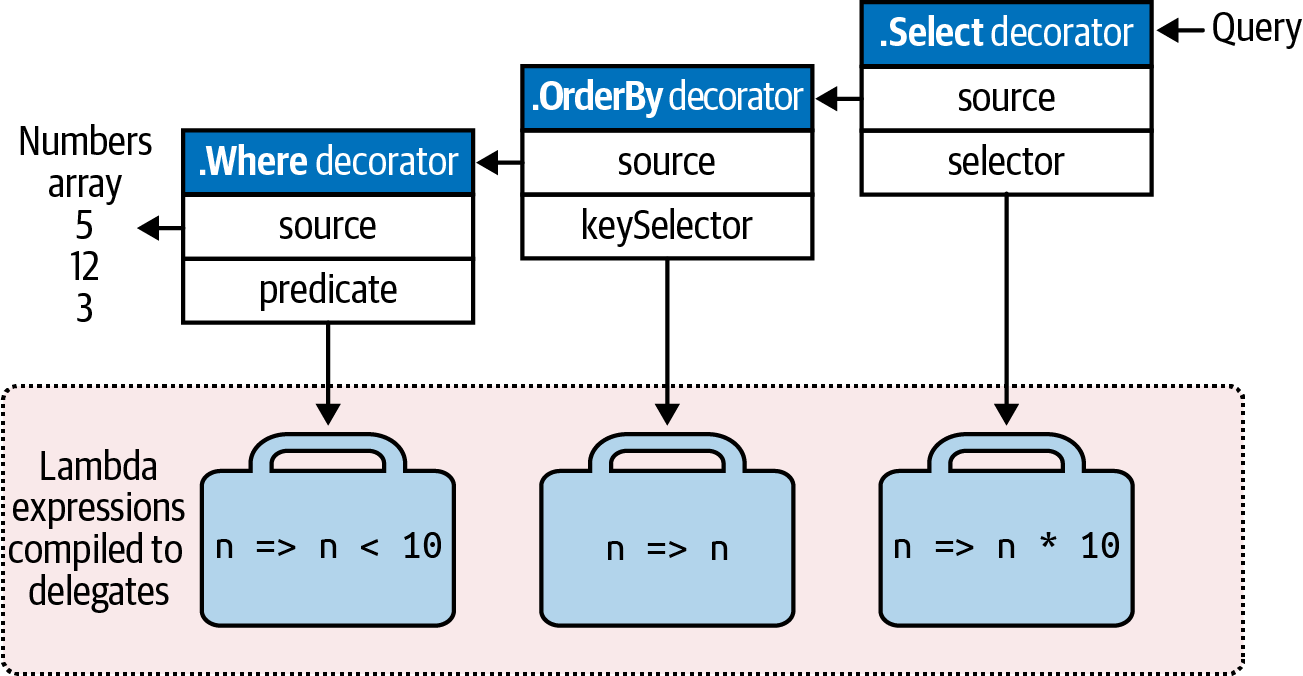

### How Queries Are Executed

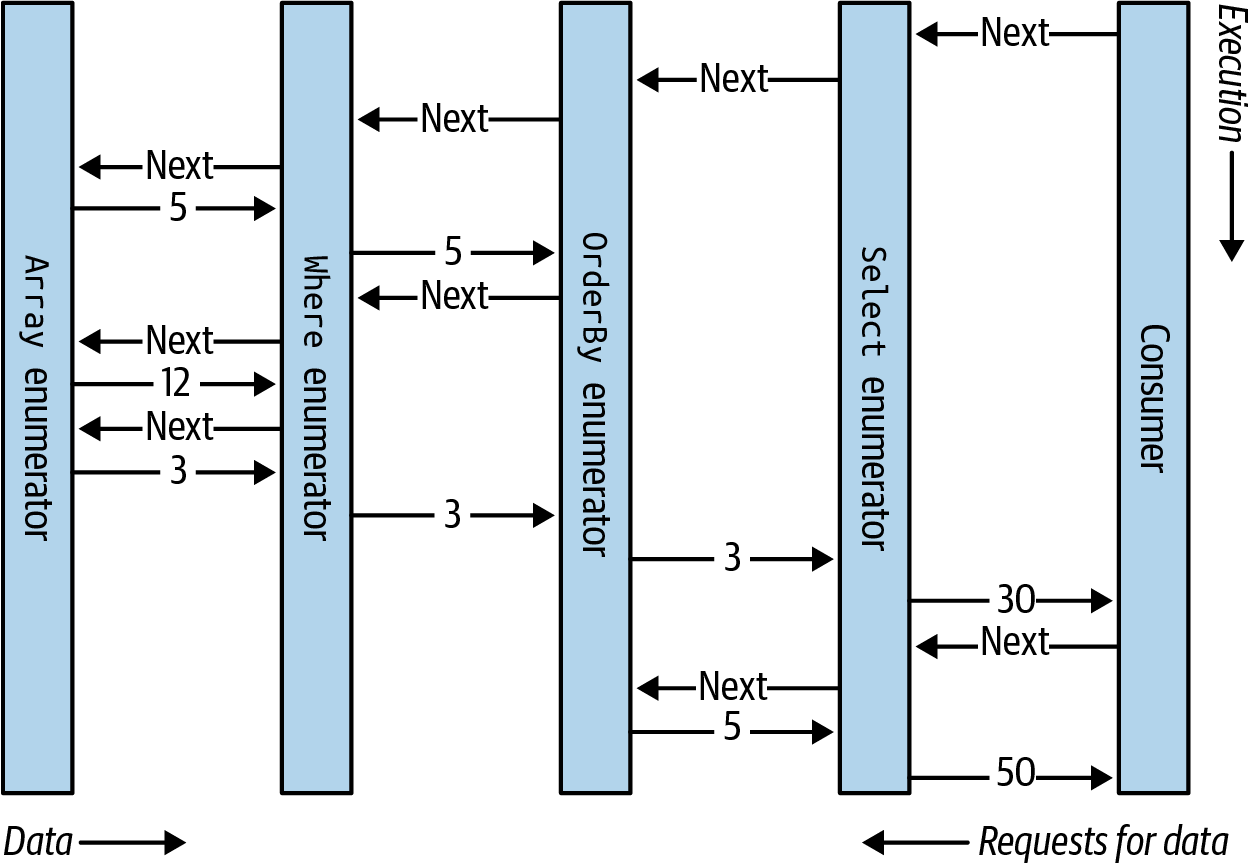

in above example, just `OrderBy` operator `waits for all data` from `Where`, but `Where` and `Select` operator, pass data, `one by one`.